In [8]:
#!pip install opencv-contrib-python
!pip install pathos
# !which pip

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 81 kB 603 kB/s 
     |████████████████████████████████| 126 kB 811 kB/s 
     |████████████████████████████████| 65 kB 768 kB/s 
     |████████████████████████████████| 81 kB 967 kB/s 


In [2]:
%matplotlib inline

from sklearn.cluster import DBSCAN

import matplotlib.pyplot as plt
import numpy as np
import cv2

In [4]:
def vconcat(data):
    size = sum([max(im.shape) for im in data]) // len(data)
    return cv2.vconcat([cv2.resize(x, (size, size), interpolation=cv2.INTER_CUBIC) for x in data]), size, len(data)


def get_sign_by_h(h):
    print(h)
    return h // t_size

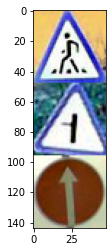

In [5]:
# target = cv2.imread('c.png')
# base = cv2.imread('a.jpg')
target, t_size, t_cnt = vconcat([cv2.imread('q1.png'), cv2.imread('q2.png'), cv2.imread('q3.png')])
base = cv2.imread('a1.jpg')
plt.imshow(target)

In [6]:
sift = cv2.xfeatures2d.SIFT_create()

k1, d1 = sift.detectAndCompute(target, None)
k2, d2 = sift.detectAndCompute(base, None)

[ True  True  True  True  True] [0 0 1 0 2]
[[ 20.790413 189.06284 ]
 [ 20.790413 189.06284 ]
 [ 12.956237 209.1464  ]]
[ 18.179022 195.75737 ]
[[  7.6727285 280.65012  ]]
[  7.6727285 280.65012  ]
[[ 94.25627 254.63986]]
[ 94.25627 254.63986]


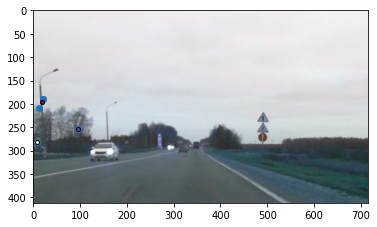

[ True  True  True  True  True  True  True  True  True  True  True  True
  True] [0 1 2 2 3 3 3 3 2 2 0 1 2]
[[164.19705 302.40732]
 [166.83286 314.76303]]
[165.51495 308.58517]
[[ 31.071983 275.26474 ]
 [ 31.308798 261.8619  ]]
[ 31.190392 268.56332 ]
[[491.31696 242.29941]
 [481.867   281.7601 ]
 [494.1483  240.51831]
 [470.35397 282.95456]
 [483.03635 249.80301]]
[484.14453 259.46707]
[[ 22.078735 205.58775 ]
 [ 12.442332 161.52895 ]
 [ 15.519876 164.91022 ]
 [ 15.519876 164.91022 ]]
[ 16.390205 174.23428 ]


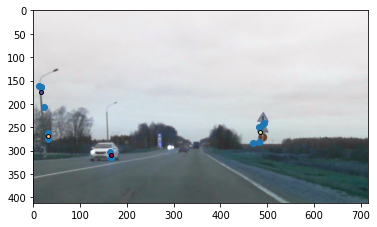

[ True  True  True  True  True] [0 0 0 1 1]
[[503.2189  233.8667 ]
 [490.68332 267.9142 ]
 [490.68332 267.9142 ]]
[494.86185 256.56503]
[[246.76839 245.25327]
 [246.76839 245.25327]]
[246.76839 245.25327]


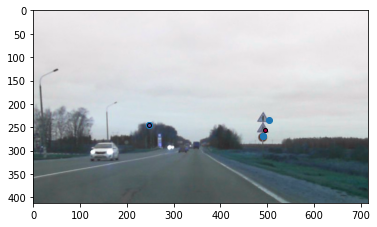

In [31]:
from pprint import pprint as p

matches = cv2.FlannBasedMatcher(
    dict(algorithm=0, trees=5),
    dict(checks=50)
).knnMatch(d1, d2, k=2)

matches = [i for (i, j) in matches if i.distance < 0.9 * j.distance]

if len(matches) > 0:
    pts = np.float32([(k1[m.queryIdx].pt, k2[m.trainIdx].pt) for m in matches])
    # print(pts)
    # print(groups)
    # print(np.unique(groups, return_index=True))
    # res = np.split(pts, np.unique(groups, return_index=True)[1])
    # p()

    sign_groups = np.int32(pts[:,0,1] // t_size)

    for g in range(t_cnt):
        data = pts[sign_groups == g]
        if data.shape[0] == 0: continue
        # print(g, data)
        # print(data[:,0,0])
        dst = data[:,1,:]

        db = DBSCAN(eps=0.1 * (sum(base.shape) // 2), min_samples=1).fit(dst)
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_
        print(core_samples_mask, labels)


        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)

        plt.imshow(base)

        unique_labels = set(labels)
        colors = [plt.cm.Spectral(each)
                for each in np.linspace(0, 1, len(unique_labels))]
        for k, col in zip(unique_labels, colors):
            if k == -1:
                col = [0, 0, 0, 1]

            class_member_mask = ()

            xy = dst[(labels == k) & core_samples_mask]
            center = np.average(xy, axis=0)
            print(xy)
            print(center[:])
            plt.plot(center[:1], center[1:], 'o', markerfacecolor=tuple(col),
                    markeredgecolor='k', markersize=4)

        plt.scatter(data[:,1,0], data[:,1,1])

        plt.show()


5
[[[ 16.930565  51.911297]
  [491.31696  242.29941 ]]

 [[ 23.0837   110.812096]
  [490.68332  267.9142  ]]

 [[ 24.009212  72.6051  ]
  [ 12.442332 161.52895 ]]

 [[ 27.496675 111.847336]
  [246.76839  245.25327 ]]

 [[ 27.990438  62.27601 ]
  [494.1483   240.51831 ]]]


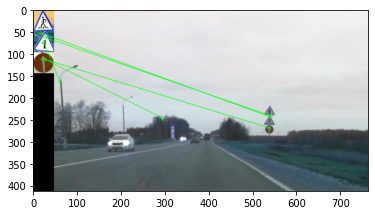

(<matplotlib.image.AxesImage at 0x7f2b8ba245b0>, None)

In [119]:
matches = cv2.FlannBasedMatcher(
    dict(algorithm=0, trees=5),
    dict(checks=50)
).knnMatch(d1, d2, k=2)

matches = [i for (i, j) in matches if i.distance < 0.8 * j.distance]
print(len(matches))
if len(matches)>0:
    pts = np.float32([(k1[m.queryIdx].pt, k2[m.trainIdx].pt) for m in matches])
    print(pts)
    
    groups = []
    for m in matches:
        p = k1[m.queryIdx].pt, k2[m.trainIdx].pt
        # groups[]

    src_pts = np.float32([ k1[m.queryIdx].pt for m in matches ]).reshape(-1,1,2)
    dst_pts = np.float32([ k2[m.trainIdx].pt for m in matches ]).reshape(-1,1,2)

    # # pts = pts.reshape(-1,1,2,2)
    # print(pts)
    # print(pts[:,:,0])
    # print(pts[:,:,:,1])
    # print(src_pts[0,0])
    # print(dst_pts[0,0])
    # print(dst_pts)
    
    # base = cv2.line(base, tuple(src_pts[0,0]), tuple(dst_pts[0,0], (255, 255, 0), 4)

    # M, mask = cv2.findHomography(pts[:,:,0], pts[:,:,1], cv2.RANSAC,5.0)
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()
    # h,w,d = target.shape
    # pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    # dst = cv2.perspectiveTransform(pts,M)
    # base = cv2.polylines(base,[np.int32(dst)],True,255,3, cv2.LINE_AA)
    # dst_pts = dst_pts[:,0,:]
    # print(dst_pts)
    # plt.scatter(dst_pts[:,0,0] + 50, dst_pts[:,0,1])
    # criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    # ret,label,center=cv2.kmeans(dst_pts,5,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

#     print(label)
#     A = dst_pts[label.ravel()==0]
#     B = dst_pts[label.ravel()==1]
#     # print(A, B)
# # Plot the data
#     plt.scatter(A[:,0],A[:,1])
#     plt.scatter(B[:,0],B[:,1],c = 'r')
#     plt.scatter(center[:,0],center[:,1],s = 80,c = 'y', marker = 's')
# plt.xlabel('Height'),plt.ylabel('Weight')
# plt.show()

draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                #    matchesMask = matchesMask, # draw only inliers
                   flags = 2)
img3 = cv2.drawMatches(target,k1,base,k2,matches,None,**draw_params)

# img3 = cv2.line(img3, tuple(src_pts[0,0]), tuple(dst_pts[0,0] + 50), (0, 255, 0), 5)

plt.imshow(img3),plt.show()

# plt.imshow(
#     cv2.drawMatchesKnn(
#         target, k1, 
#         base, k2,
#         matches, 
#         None, 
#         matchColor=(255, 0, 0),
#         matchesMask=mask,
#         flags = 0
#     )
# )

# plt.imshow(img)